In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]
df_2016.columns

Index(['year', 'state', 'state_po', 'county', 'FIPS', 'office', 'candidate',
       'party', 'candidatevotes', 'totalvotes', 'version'],
      dtype='object')

In [3]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state", "state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)

#Create column for winner and margin of victory
election_2012["Winner"] = np.where(election_2012['Barack Obama']>election_2012["Mitt Romney"], 'Barack Obama', 'Mitt Romney')
election_2012["Margin"] = np.where(election_2012["Winner"]=="Mitt Romney", 
                                   election_2012["Mitt Romney"]-election_2012["Barack Obama"],
                                   election_2012["Barack Obama"]-election_2012["Mitt Romney"])
#Preview results
election_2012.head(10)


Barack Obama  Mitt Romney  Other  Total Votes  \
state   state_po county                                                    
Alabama AL       Autauga           6363        17379    190        23932   
                 Baldwin          18424        66016    898        85338   
                 Barbour           5912         5550     47        11509   
                 Bibb              2202         6132     86         8420   
                 Blount            2970        20757    279        24006   
                 Bullock           4061         1251     10         5322   
                 Butler            4374         5087     35         9496   
                 Calhoun          15511        30278    468        46257   
                 Chambers          6871         7626    114        14611   
                 Cherokee          2132         7506    141         9779   

                                 Winner  Margin  
state   state_po county                          
Alabama AL       Autauga    Mitt Romney   11016  
                 Baldwin    Mitt Romney   47592  
                 Barbour   Barack Obama     362  
                 Bibb       Mitt Romney    3930  
                 Blount     Mitt Romney   17787  
                 Bullock   Barack Obama    2810  
                 Butler     Mitt Romney     713  
                 Calhoun    Mitt Romney   14767  
                 Chambers   Mitt Romney     755  
                 Cherokee   Mitt Romney    5374

In [4]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()


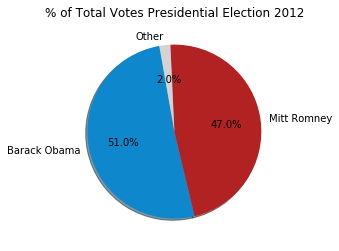

In [5]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [6]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2016 = merged_2016.groupby(["state","state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Create column for winner and margin of victory
election_2016["Winner"] = np.where(election_2016['Hillary Clinton']>election_2016["Donald Trump"], 'Hillary Clinton', 'Donald Trump')
election_2016["Margin"] = np.where(election_2016["Winner"]=="Donald Trump", 
                                   election_2016["Donald Trump"]-election_2016["Hillary Clinton"],
                                   election_2016["Hillary Clinton"]-election_2016["Donald Trump"])
#Preview results
election_2016.head(10)


Donald Trump  Hillary Clinton  Other  Total Votes  \
state   state_po county                                                        
Alabama AL       Autauga          18172             5936    865        24973   
                 Baldwin          72883            18458   3874        95215   
                 Barbour           5454             4871    144        10469   
                 Bibb              6738             1874    207         8819   
                 Blount           22859             2156    573        25588   
                 Bullock           1140             3530     40         4710   
                 Butler            4901             3726    105         8732   
                 Calhoun          32865            13242   1757        47864   
                 Chambers          7843             5784    273        13900   
                 Cherokee          8953             1547    233        10733   

                                    Winner  Margin  
state   state_po county                             
Alabama AL       Autauga      Donald Trump   12236  
                 Baldwin      Donald Trump   54425  
                 Barbour      Donald Trump     583  
                 Bibb         Donald Trump    4864  
                 Blount       Donald Trump   20703  
                 Bullock   Hillary Clinton    2390  
                 Butler       Donald Trump    1175  
                 Calhoun      Donald Trump   19623  
                 Chambers     Donald Trump    2059  
                 Cherokee     Donald Trump    7406

In [7]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

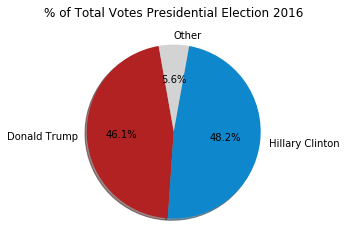

In [8]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [9]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Create column for percent change between total votes in 2012 and 2016
election_df["Total_Votes_Percent_Change"] = round((election_df["Total Votes_2016"] - election_df["Total Votes_2012"]) / election_df["Total Votes_2012"] * 100,2)

#Show results
election_df.head(10)

#export as CSV
election_df.reset_index().to_csv("2012_2016_election.csv")

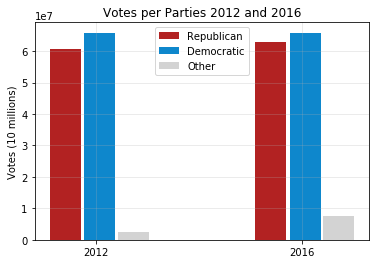

In [10]:
republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Show bar chart
plt.show()

In [11]:
#Store number of counties that changed parties between 2012 and 2016
#dem_rep_df = pd.DataFrame(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])

Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
Rep_Dem = len(election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")])

In [12]:
#Read in demographic data
demo_df = pd.read_csv("demographic_data.csv")

#Split data in county on the comma, replace "county" with ""
demo_df['county'] = demo_df['county'].str.split(',').str[0]
demo_df["county"] = demo_df.county.str.replace(" County", "",)

#Group data, export if necessary
grouped_demo = demo_df.groupby(["state", "county"]).sum()
#grouped_demo.reset_index().to_csv("grouped_demo.csv")

#Read in income and poverty data
income_df = pd.read_csv("income_data.csv")

#Replace "Parish" with ""
income_df["Name"] = income_df.Name.str.replace(" Parish", "")

#Replace "County" with ""
income_df["Name"] = income_df.Name.str.replace(" County", "")

#Replace "city" with ""
income_df["Name"] = income_df.Name.str.replace(" city", "")

income_df = income_df[["Postal Code", "Name", "Poverty Percent, All Ages", "Median Household Income"]]

income_df.head()

,Postal Code,Name,"Poverty Percent, All Ages",Median Household Income
0,HI,Kalawao,.,.
1,VA,Loudoun,3.0,"136,191"
2,VA,Falls Church,3.4,"123,923"
3,CA,Santa Clara,7.5,"118,468"
4,NM,Los Alamos,3.7,"118,380"


In [13]:
#Read in clean data
election = pd.read_csv("2012_2016_election.csv")
demographics = pd.read_csv("demo_clean.csv")

#Replace "Parish" with ""
demographics["county"] = demographics.county.str.replace(" Parish", "")


In [14]:
#Merge dataframes
election_merged = pd.merge(election, demographics)
#election_merged = pd.merge(election_merged, income_df)

#Make new columns for dem/rep percent change
election_merged["Dem_Votes_Percent_Change"] = round((election_merged["Hillary Clinton"] - election_merged["Barack Obama"]) / election_merged["Barack Obama"] * 100,2)
election_merged["Rep_Votes_Percent_Change"] = round((election_merged["Donald Trump"] - election_merged["Mitt Romney"]) / election_merged["Mitt Romney"] * 100,2)

#dem_rep_df.reset_index(inplace=True)
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)
income_df.rename(columns={"Name":"county"}, inplace=True)

election_merged = pd.merge(election_merged, income_df)
election_merged["Median Household Income"] = election_merged["Median Household Income"].str.replace(",","")
election_merged["Median Household Income"] = election_merged["Median Household Income"].astype("int")
election_merged["Poverty Percent, All Ages"] = election_merged["Poverty Percent, All Ages"].astype("float")

In [15]:
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)

election_merged.T

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148
state,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
Postal Code,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
county,Autauga,Baldwin,Barbour,Bibb,Blount,Bullock,Butler,Calhoun,Chambers,Cherokee,...,Niobrara,Park,Platte,Sheridan,Sublette,Sweetwater,Teton,Uinta,Washakie,Weston
Barack Obama,6363,18424,5912,2202,2970,4061,4374,15511,6871,2132,...,200,2927,1223,3618,767,4774,6213,1628,794,422
Mitt Romney,17379,66016,5550,6132,20757,1251,5087,30278,7626,7506,...,1022,11234,3136,10267,3472,11428,4858,6615,3014,2821
Other_2012,190,898,47,86,279,10,35,468,114,141,...,54,447,172,437,137,693,393,296,136,116
Total Votes_2012,23932,85338,11509,8420,24006,5322,9496,46257,14611,9779,...,1276,14608,4531,14322,4376,16895,11464,8539,3944,3359
Winner_2012,Mitt Romney,Mitt Romney,Barack Obama,Mitt Romney,Mitt Romney,Barack Obama,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,...,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,Mitt Romney,Barack Obama,Mitt Romney,Mitt Romney,Mitt Romney
Margin_2012,11016,47592,362,3930,17787,2810,713,14767,755,5374,...,822,8307,1913,6649,2705,6654,1355,4987,2220,2399


In [16]:
#Create dataframe for counties that switched
rep_dem_df = election_merged[(election_merged.Winner_2012 == "Mitt Romney") & (election_merged.Winner_2016 == "Hillary Clinton")]
dem_rep_df = election_merged[(election_merged.Winner_2012 == "Barack Obama") & (election_merged.Winner_2016 == "Donald Trump")]

total_count = election_merged.state.value_counts()
population = election_merged.groupby("state")["total_population"].sum()
switched_count = dem_rep_df.state.value_counts()

switch = pd.DataFrame({"switched": switched_count, "total":total_count, "population":population.apply(lambda x: f"{x:,.0f}")})
switch.dropna(inplace=True)
switch["%_Change"] = round(switch.switched / switch.total * 100,0)
switch.sort_values("switched", ascending=False, inplace=True)

switch.head(10)

#dem_rep_df.columns
#switch.max()

,switched,total,population,%_Change
Iowa,32.0,100,"3,028,691",32.0
Wisconsin,23.0,72,"5,643,185",32.0
New York,22.0,63,"21,004,399",35.0
Minnesota,18.0,85,"5,040,446",21.0
Michigan,12.0,83,"9,961,406",14.0
Illinois,11.0,101,"12,694,701",11.0
Ohio,9.0,88,"11,524,162",10.0
Maine,8.0,16,"1,322,366",50.0
North Carolina,7.0,100,"9,290,565",7.0
Virginia,7.0,132,"9,205,915",5.0


In [17]:
age_bins = [0, 34, 40, 45, 100]
age_names = ["<35", "36-40", "41-45", "$46+"]
income_bins = [0, 34999, 45000, 55000, 65000, 75000, 200000]
income_names = ["<$35,000", "$35,001-$45,000", "$45,001-$55,000", "$55,001-$65,000", "$65,001-$75,000", "$75,001+"]

election_merged["Age Ranges"] = pd.cut(election_merged["median_age"], age_bins, labels = age_names)
election_merged["Median Income Ranges"] = pd.cut(election_merged["Median Household Income"], income_bins, labels = income_names)

In [18]:
#Create dataframe for counties that switched
#rep_dem_df = election_merged[(election_merged.Winner_2012 == "Mitt Romney") & (election_merged.Winner_2016 == "Hillary Clinton")]
#dem_rep_df = election_merged[(election_merged.Winner_2012 == "Barack Obama") & (election_merged.Winner_2016 == "Donald Trump")]

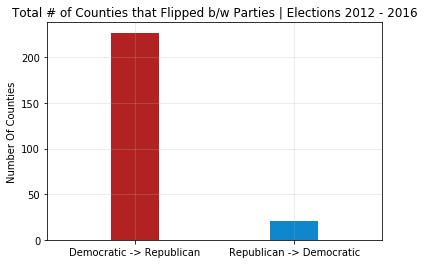

In [19]:
parties_flipped = [Dem_Rep, Rep_Dem]

#The x location
x_axis = np.arange(len(parties_flipped))

#Create the bars
plt.bar(x_axis, parties_flipped, color=('firebrick','#0e87cc'), align="center",  width=0.3)

#Set ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Democratic -> Republican", "Republican -> Democratic"])

# Set the limits of the x axis
plt.xlim(-0.55, len(x_axis)-0.45)

#Add grid
plt.grid(alpha= 0.3)

#Add title and labels
plt.title("Total # of Counties that Flipped b/w Parties | Elections 2012 - 2016")
plt.ylabel("Number Of Counties")

#Show bar chart
plt.show()

In [20]:
switch_sum = dem_rep_df.sum()

percent_change_dem = round((switch_sum["Hillary Clinton"] - switch_sum["Barack Obama"]) / switch_sum["Barack Obama"] * 100, 2)
percent_change_rep = round((switch_sum["Donald Trump"] - switch_sum["Mitt Romney"]) / switch_sum["Mitt Romney"] * 100, 2)

print(f"{percent_change_dem}% decrease from Rep. to Dem.")
print(f"{percent_change_rep}% increase from Dem. to Rep.")

-13.85% decrease from Rep. to Dem.
18.08% increase from Dem. to Rep.


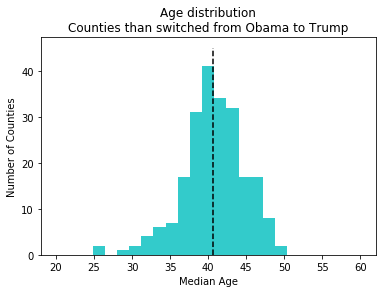

In [21]:
dem_rep_df["median_age"].plot(kind="hist", bins=25, alpha = 0.8, color = 'c', range =(20,60))
plt.xlabel("Median Age")
plt.ylabel("Number of Counties")
plt.title("Age distribution\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df["median_age"].mean(), ymin=0,ymax=45,linestyles ="dashed")


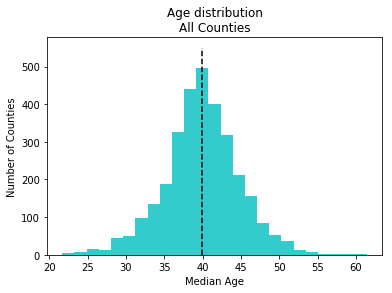

In [22]:
election_merged["median_age"].plot(kind="hist", bins=25, alpha = 0.8, color = 'c')
plt.xlabel("Median Age")
plt.ylabel("Number of Counties")
plt.title("Age distribution\nAll Counties")
plt.vlines(election_merged["median_age"].mean(), ymin=0,ymax=550, linestyles ="dashed")

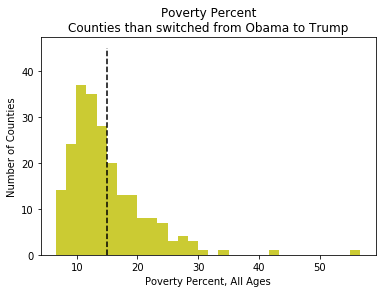

In [23]:
dem_rep_df['Poverty Percent, All Ages'].plot(kind="hist", bins=30, alpha = 0.8, color = 'y')
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df['Poverty Percent, All Ages'].mean(), ymin=0,ymax=45,linestyles ="dashed")

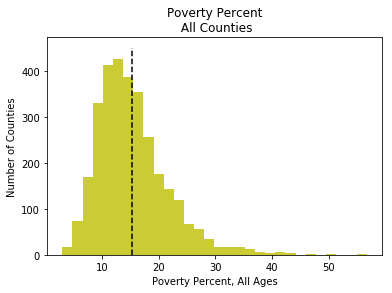

In [24]:
election_merged['Poverty Percent, All Ages'].plot(kind="hist", bins=30, alpha = 0.8, color = 'y')
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\n All Counties")
plt.vlines(election_merged['Poverty Percent, All Ages'].mean(), ymin=0,ymax=450,linestyles ="dashed")

In [25]:
election_merged.columns

Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_age', 'unemployment',
       'total_population', 'graduate_degree', 'at_least_bachelor_s_degree',
       'at_least_high_school_diploma', 'less_than_high_school',
       'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income', 'Age Ranges

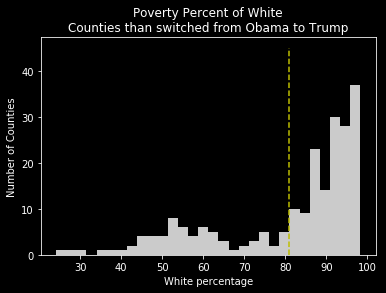

In [26]:
plt.style.use('dark_background')
dem_rep_df['white'].plot(kind="hist", bins=30, alpha = 0.8, color = 'w')
plt.xlabel("White percentage")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent of White\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df['white'].mean(), ymin=0,ymax=45,colors = "y", linestyles ="dashed")

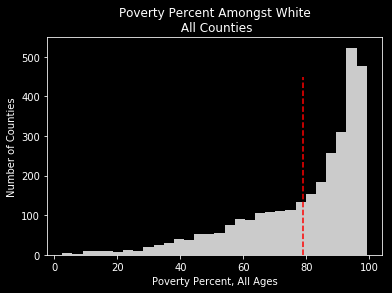

In [27]:
election_merged['white'].plot(kind="hist", bins=30, alpha = 0.8, color = 'w')
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent Amongst White\n All Counties")
plt.vlines(election_merged['white'].mean(), ymin=0,ymax=450, colors = "r", linestyles ="dashed")

In [28]:
#New DF for dem_rep in swing states
swing_state_df = dem_rep_df[(election_merged.state == "Pennsylvania") |
                                 (election_merged.state == "Michigan") |
                                 (election_merged.state == "Wisconsin") |
                                 (election_merged.state == "Ohio")]


swing_state_df.columns

#swing_state_df.head().T

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_age', 'unemployment',
       'total_population', 'graduate_degree', 'at_least_bachelor_s_degree',
       'at_least_high_school_diploma', 'less_than_high_school',
       'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income'],
      dtyp

In [29]:
swing_state_df = swing_state_df.drop(['Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_earnings_2010_dollars', 'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations'], axis=1)

In [30]:
swing_state_df.columns

Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'median_age',
       'unemployment', 'total_population', 'graduate_degree',
       'at_least_bachelor_s_degree', 'at_least_high_school_diploma',
       'less_than_high_school', 'white', 'black', 'hispanic', 'asian',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income'],
      dtype='object')

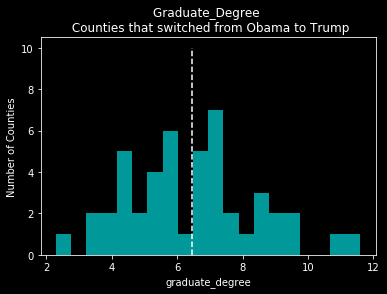

In [40]:

swing_state_df['graduate_degree'].plot(kind="hist", bins=20, alpha = 0.8, color = 'c')
plt.xlabel("graduate_degree")
plt.ylabel("Number of Counties")
plt.title("Graduate_Degree \n Counties that switched from Obama to Trump")
plt.vlines(swing_state_df['graduate_degree'].mean(), ymin=0,ymax=10, colors = 'w', linestyles ="dashed")

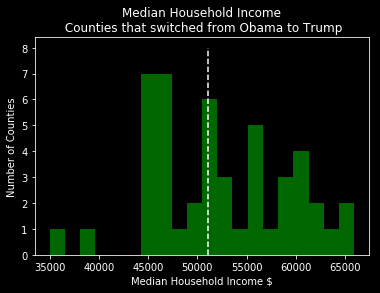

In [39]:
swing_state_df['Median Household Income'].plot(kind="hist", bins=20, alpha = 0.8, color = 'g')
plt.xlabel("Median Household Income $")
plt.ylabel("Number of Counties")
plt.title("Median Household Income\n Counties that switched from Obama to Trump")
plt.vlines(dem_rep_df['Median Household Income'].mean(), ymin=0,ymax=8, colors = 'w', linestyles ="dashed")

In [33]:
dem_rep_df.columns

Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_age', 'unemployment',
       'total_population', 'graduate_degree', 'at_least_bachelor_s_degree',
       'at_least_high_school_diploma', 'less_than_high_school',
       'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income'],
      dtyp

In [34]:
#swing_state_df.describe()
#Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
MI_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Michigan")])
WI_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Wisconsin")])
OH_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Ohio")])
PA_dem_rep = len(dem_rep_df[(dem_rep_df.state == "Pennsylvania")])

In [41]:
#dem_rep_df1 = dem_rep_df.rename(columns = {'Median Household Income': 'MHI'})
#dem_rep_df1 = dem_rep_df.rename(columns =  {'Poverty Percent': 'poverty'})

In [43]:
#rename MHI

#Dataframes 
MI_dem_rep_df = dem_rep_df[(dem_rep_df.state == "Michigan")]
WI_dem_rep_df = dem_rep_df[(dem_rep_df.state == "Wisconsin")]
OH_dem_rep_df = dem_rep_df[(dem_rep_df.state == "Ohio")]
PA_dem_rep_df = dem_rep_df[(dem_rep_df.state == "Pennsylvania")]

#Values for white in swing counties
MI_dem_rep_white = MI_dem_rep_df.white.mean()
WI_dem_rep_white = WI_dem_rep_df.white.mean()
OH_dem_rep_white = OH_dem_rep_df.white.mean()
PA_dem_rep_white = PA_dem_rep_df.white.mean()

#Values for poverty in swing counties
#MI_dem_rep_po = MI_dem_rep_df.poverty.mean()
#WI_dem_rep_po = WI_dem_rep_df.poverty.mean()
#OH_dem_rep_po = OH_dem_rep_df.poverty.mean()
#PA_dem_rep_po = PA_dem_rep_df.poverty.mean()

#Values for MHI in swing counties
#MI_dem_rep_mhi = MI_dem_rep_df.MHI.mean()
#WI_dem_rep_mhi = WI_dem_rep_df.MHI.mean()
#OH_dem_rep_mhi = OH_dem_rep_df.MHI.mean()
#PA_dem_rep_mhi = PA_dem_rep_df.MHI.mean()

#Values for education in swing counties
MI_dem_rep_ed = MI_dem_rep_df.at_least_bachelor_s_degree.mean()
WI_dem_rep_ed = WI_dem_rep_df.at_least_bachelor_s_degree.mean()
OH_dem_rep_ed = OH_dem_rep_df.at_least_bachelor_s_degree.mean()
PA_dem_rep_ed = PA_dem_rep_df.at_least_bachelor_s_degree.mean()

#state_df = pd.DataFrame({"D2R_MI":MI_dem_rep, "D2R_WI":WI_dem_rep, "D2R_OH":OH_dem_rep, "D2R_PA":PA_dem_rep})

In [44]:
MI_dem_rep_df.columns

Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_age', 'unemployment',
       'total_population', 'graduate_degree', 'at_least_bachelor_s_degree',
       'at_least_high_school_diploma', 'less_than_high_school',
       'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income'],
      dtyp

In [51]:
round(swing_state_df.describe().T, 1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,47.0,2389.9,760.6,1249.0,1688.5,2302.0,3084.5,3124.0
median_age,47.0,41.0,4.3,25.1,39.1,40.7,43.2,48.7
unemployment,47.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1
total_population,47.0,115692.4,154977.0,7415.0,20374.5,60107.0,155585.0,834723.0
graduate_degree,47.0,6.4,2.0,2.3,5.1,6.5,7.5,11.6
at_least_bachelor_s_degree,47.0,18.7,4.7,8.5,15.4,18.6,22.2,29.3
at_least_high_school_diploma,47.0,87.7,2.3,79.7,86.6,87.7,89.1,92.5
less_than_high_school,47.0,12.3,2.3,7.5,10.9,12.3,13.4,20.3
white,47.0,89.6,6.6,71.1,85.7,91.2,95.1,98.0
black,47.0,3.7,4.5,0.2,0.4,2.1,5.1,20.4
